# 2nd Assignment - Numerical optimization and large scale linear algebra

---

> Nikos Tsoukalelis, Data Science Part Time student, 2022 <br />
> Athens University of Economics and Business <br />
> ntsoukalelis@aueb.gr

> #### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Exercise : In this exercise we explore a simple approach to steganography that relies on constrained least squares. The secret message is given by a k-vector s with entries that are all either +1 or -1 (i.e., it is a Boolean vector). The original image is given by the n-vector x, where n is usually much larger than k. We send (or publish or transmit) the modified message $x + z$, where z is an n-vector of modifications. We would like z to be small, so that the original image x and the modified one $x+z$ look (almost) the same. Our accomplice decodes the message s by multiplying the modifieed image by $k\times n$ matrix D, which yields the k-vector $ y = D(x + z) $.

### <font size="5">a)</font>   Encoding via least norm. Let be a positive constant. We choose z to minimize  $ \lVert z \rVert^2 $ subject to $ D(x+z) = as $. (This guarantees that the decoded message is correct, i.e.,  $\hat {s}=s$) . Give a formula for z in terms of $ D^\dagger$, $a$, and $x$.

#### The objective is to minimize $ \lVert z \rVert^2 $ subject to $$ D(x+z)=as $$ $$ Dz = as -Dx $$
#### So the $z$ becomes: $$ z= D^\dagger (as -Dx)$$

### <font size="5">b)</font> Complexity. What is the complexity of encoding a secret message in an image? (You can assume that $ D^\dagger$ is already computed and saved.) What is the complexity of decoding the secret message? About how long would each of these take with a computer capable of carrying out 1 Gflop/s, for $k = 128$ and $n = 512^2$ $= 262144$ (a $512\times 512$  image)?

#### <u>Encoding </u>: we compute from the above equation $D^\dagger (as -Dx)$. From all the calculations (dimension-wise) we get $2kn$ flops. 
#### We could although ignore the subtraction (explained below)  and for this case the result is $4kn$.
#### <u>Decoding </u>: Using the equation  $ y = D(x + z) $ (dimension-wise), we get $2kn$ flops. 
#### More specifically the above derives from the flops calculation which is the dimension of the output table e.g. $k x n$$(2n$(or k)$ - 1)$ where k and n are the dimensions of the output matrix and 
#### 2n(or k)-1 the multiplications that are taking place in the calculation.
#### For $k = 128$ and $n = 512^2$ we get:
 - #### Encoding: $2kn = 33.5 \times 10^6$ flops. Given that our computer can carry out 1 Gflop/s we get 0.067 sec. 
 - #### Decoding: $2kn = 33.5 \times 10^6$ flops. Given that our computer can carry out 1 Gflop/s we get 0.067 sec. If encoding is considered though $4kn$ we get 0.134 sec.

### <font size="5">c)</font> Try it out.

> #### We read the image. And we turn to Black and White.

In [2]:
img = cv2.imread('Cameraman.jpg', 1) 
originalImage = cv2.imread('Cameraman.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
  
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)

> #### Printing the shape and the matrix of the image.

In [3]:
print(blackAndWhiteImage.shape)
print("----------------")
print(blackAndWhiteImage)

(512, 512)
----------------
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ...   0   0   0]]


> #### Normilizing the matrix of the image showing only 1's and 0's.

In [4]:
blackAndWhiteImage_normalized=blackAndWhiteImage/255
x=blackAndWhiteImage_normalized
x_flat=x.flatten()
x_flat=x_flat.reshape((262144,1))

> #### Printing out the two images (grayscale and black and white image).

In [5]:
cv2.imshow('Black white image', blackAndWhiteImage)
cv2.imshow('Original image',originalImage)
#cv2.imshow('Gray image', grayImage)
cv2.waitKey(0)
cv2.destroyAllWindows()
#the program outputs two new windows of the pictures, to run the code close the 2 windows.

> #### Creating the D vector. Afterwards, we nomralize it, finding the norm and outputting the results.

In [6]:
D=np.random.uniform(low=-1, high=1, size=(128,512))
D_norm = np.linalg.norm(D)

D_normalized = D/D_norm

print(f"D = {D}")

print(f"L2 norm of D = {D_norm}")

print(f"normalized D = {D_normalized}")

D = [[ 0.08280873 -0.97209763  0.19279539 ... -0.13120057  0.91827387
  -0.92502379]
 [ 0.68477084  0.76843177 -0.17425018 ... -0.08917145 -0.53554145
   0.97358058]
 [-0.30521965  0.58648459  0.11296157 ...  0.67139881 -0.41040178
  -0.01100494]
 ...
 [ 0.67365372 -0.96036432 -0.20780932 ...  0.84949766  0.82946344
  -0.46735361]
 [ 0.75506931  0.17257926 -0.17745154 ...  0.47493433  0.44805334
  -0.90230786]
 [-0.8381215   0.65722394  0.82914739 ...  0.13904425 -0.29497624
   0.45694455]]
L2 norm of D = 147.84613627237795
normalized D = [[ 5.60100743e-04 -6.57506282e-03  1.30402727e-03 ... -8.87412905e-04
   6.21101027e-03 -6.25666529e-03]
 [ 4.63164513e-03  5.19750999e-03 -1.17859135e-03 ... -6.03136836e-04
  -3.62228914e-03  6.58509313e-03]
 [-2.06444119e-03  3.96685777e-03  7.64048171e-04 ...  4.54119954e-03
  -2.77587085e-03 -7.44350836e-05]
 ...
 [ 4.55645133e-03 -6.49570118e-03 -1.40557828e-03 ...  5.74582251e-03
   5.61031531e-03 -3.16108096e-03]
 [ 5.10712912e-03  1.16728964e

> #### Checking if the vector is nomralized correctly, that is if it gives length =1 

In [7]:
l = np.linalg.norm(D_normalized)

print(f"Length of normalized vector = {l}")

Length of normalized vector = 1.0


> #### Calculating the D dagger (pseudo inverse)

In [8]:
D_dagger=np.linalg.pinv(D_normalized)
#D_dagger_flat=D_dagger.flatten()
#D_dagger_flat

> #### Original image matrix.

In [9]:
x

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

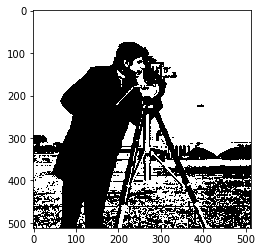

In [10]:
plt.imshow(x, interpolation='nearest',cmap='gray')
plt.show()

> #### Printing out the original image using the cv as well and saving to a csv file.

In [11]:
cv2.imshow('image',x)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('original_black_white.jpg', 255*x)

True

In [12]:

#import base64
#original_image = open('original_black_white.jpg', 'rb')
#original_image_read = original_image.read()
#original_image_64_encode = base64.b64encode(original_image_read)
#original_image_64_decode = base64.b64decode(original_image_64_encode) 
#image_result = open('decrypted_original_black_white.jpg', 'wb') # create a writable image and write the decoding result
#image_result.write(original_image_64_decode)

> #### Creating encoded matrix.

In [13]:
s=np.random.rand(128,1)
s.shape

(128, 1)

> #### Running the decoding code for different values of alpha.

In [14]:
a=np.array([0.0000000001,0.000000001,0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1,1.1,1.2,1.3,1.5])
all_possible_images=[]
alphas=[]
decoded_array=[]
for i in a:
    encrypted_img=x+(np.dot(D_dagger,(np.dot(i,s)-np.dot(D_normalized,x))))
    encrypted_img_new = np.where(encrypted_img > 1, 1, encrypted_img)
    encrypted_img_new = np.where(encrypted_img_new < 0, 0, encrypted_img_new)
    
    y=np.dot(D_normalized,encrypted_img_new)
    y_flat=y.flatten()
    np.sign(y_flat)
    y_sign=np.mean(np.sign(y_flat))
    
    all_possible_images.append(encrypted_img_new)
    alphas.append(i)
    decoded_array.append(y_sign)
    


> #### Creating a dataframe to input all the different image matrices, the alphas and the decoded result.

In [15]:
image_df=pd.DataFrame()
image_df['all_possible_images']=pd.Series(all_possible_images)
image_df['alphas']=pd.Series(alphas)
image_df['decoded_array']=pd.Series(decoded_array)
image_df

,all_possible_images,alphas,decoded_array
0,"[[0.4079316761526085, 0.5110595208619753, 0.51...",1.000000e-10,0.043579
1,"[[0.40793167104152606, 0.511059515750893, 0.51...",1.000000e-09,0.043579
2,"[[0.4079316199307008, 0.5110594646400681, 0.51...",1.000000e-08,0.043579
3,"[[0.40793110882245154, 0.5110589535318184, 0.5...",1.000000e-07,0.043579
4,"[[0.40792599773995675, 0.5110538424493237, 0.5...",1.000000e-06,0.043610
5,"[[0.40787488691500784, 0.511002731624375, 0.51...",1.000000e-05,0.043701
6,"[[0.4073637786655233, 0.5104916233748904, 0.51...",1.000000e-04,0.044830
7,"[[0.40225269617067505, 0.5053805408800423, 0.5...",1.000000e-03,0.057373
8,"[[0.3511418712221921, 0.4542697159315595, 0.45...",1.000000e-02,0.171082
9,"[[0.0, 0.0, 0.0, 0.0, 0.05006773635144246, 0.0...",1.000000e-01,0.734985


> #### Printing the images for the different values of alpha.

Text(0.5, 1.0, '1.5')

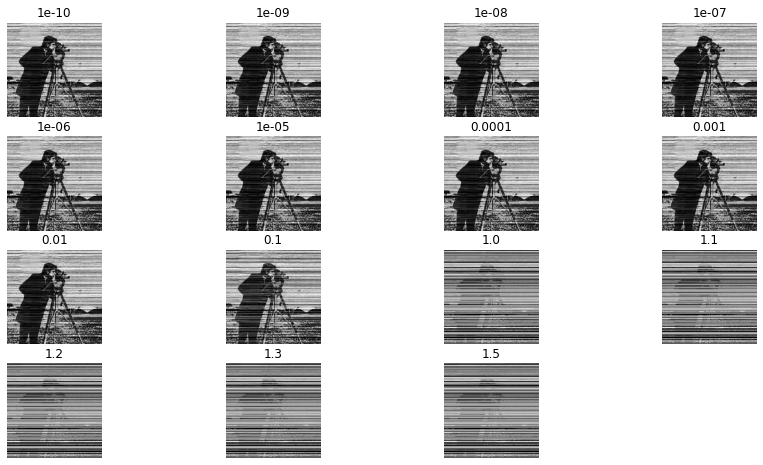

In [18]:
# create figure
fig1 = plt.figure(figsize=(15, 8))
  
# setting values to rows and column variables
rows = 4
columns = 4

fig1.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(image_df.iloc[0,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[0,1])
  
# Adds a subplot at the 2nd position
fig1.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(image_df.iloc[1,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[1,1])
  
# Adds a subplot at the 3rd position
fig1.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(image_df.iloc[2,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[2,1])

fig1.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(image_df.iloc[3,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[3,1])
  
# Adds a subplot at the 3rd position
fig1.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(image_df.iloc[4,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[4,1])

# Adds a subplot at the 3rd position
fig1.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(image_df.iloc[5,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[5,1])

fig1.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(image_df.iloc[6,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[6,1])
  
# Adds a subplot at the 3rd position
fig1.add_subplot(rows, columns, 8)
  
# showing image
plt.imshow(image_df.iloc[7,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[7,1])

# Adds a subplot at the 3rd position
fig1.add_subplot(rows, columns, 9)
  
# showing image
plt.imshow(image_df.iloc[8,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[8,1])

fig1.add_subplot(rows, columns, 10)

# showing image
plt.imshow(image_df.iloc[9,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[9,1])

fig1.add_subplot(rows, columns, 11)

# showing image
plt.imshow(image_df.iloc[10,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[10,1])

fig1.add_subplot(rows, columns, 12)

# showing image
plt.imshow(image_df.iloc[11,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[11,1])

fig1.add_subplot(rows, columns, 13)

# showing image
plt.imshow(image_df.iloc[12,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[12,1])

fig1.add_subplot(rows, columns, 14)

# showing image
plt.imshow(image_df.iloc[13,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[13,1])

fig1.add_subplot(rows, columns, 15)

# showing image
plt.imshow(image_df.iloc[14,0],cmap='gray')
plt.axis('off')
plt.title(image_df.iloc[14,1])
# showing image
#img_white_1 = np.zeros([100,100,3],dtype=np.uint8)
#img_white.fill(255) # or img[:] = 255

#plt.imshow(img_white_1)
#plt.axis('off')
#plt.title("")

### We see that as we change the alphas we can't decode so well the requested image.
### On the contrary for small values of alpha we the decoding is pretty good. Apparently with even smaller values we could get better results.

> #### We repeat the exact procedure we followed above for the second image as well.

In [19]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt
img_2 = cv2.imread('Lena.jpg', 1)

print(img_2)

[[[158 158 158]
  [159 159 159]
  [160 160 160]
  ...
  [173 173 173]
  [151 151 151]
  [117 117 117]]

 [[160 160 160]
  [159 159 159]
  [160 160 160]
  ...
  [170 170 170]
  [150 150 150]
  [119 119 119]]

 [[160 160 160]
  [158 158 158]
  [157 157 157]
  ...
  [167 167 167]
  [146 146 146]
  [116 116 116]]

 ...

 [[ 22  22  22]
  [ 29  29  29]
  [ 30  30  30]
  ...
  [ 88  88  88]
  [ 89  89  89]
  [ 87  87  87]]

 [[ 23  23  23]
  [ 29  29  29]
  [ 32  32  32]
  ...
  [ 89  89  89]
  [ 92  92  92]
  [ 91  91  91]]

 [[ 23  23  23]
  [ 30  30  30]
  [ 32  32  32]
  ...
  [ 90  90  90]
  [ 94  94  94]
  [ 94  94  94]]]


In [20]:
import cv2
  
originalImage_2 = cv2.imread('Lena.jpg')
grayImage_2 = cv2.cvtColor(originalImage_2, cv2.COLOR_BGR2GRAY)
  
(thresh, blackAndWhiteImage_2) = cv2.threshold(grayImage_2, 127, 255, cv2.THRESH_BINARY)
 


In [21]:
print(blackAndWhiteImage_2.shape)
print(" ")
print(blackAndWhiteImage_2)

(567, 567)
 
[[255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [22]:
blackAndWhiteImage_2_normalized=blackAndWhiteImage_2/255
x_2=blackAndWhiteImage_2_normalized
x_2

array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
cv2.imshow('Black white image', blackAndWhiteImage_2)
cv2.imshow('Original image',originalImage_2)
#cv2.imshow('Gray image', grayImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
D_2=np.random.uniform(low=-1, high=1, size=(128,567))
D_2

array([[-0.77662631,  0.60278794,  0.58786054, ...,  0.91673437,
        -0.25467696,  0.96979006],
       [-0.0092709 , -0.4643371 , -0.72403147, ..., -0.70344397,
        -0.3219469 , -0.81912533],
       [ 0.90124361,  0.47554296, -0.92301735, ...,  0.01816784,
         0.94816824,  0.74755844],
       ...,
       [ 0.86888628,  0.61648143, -0.5797331 , ..., -0.9540146 ,
        -0.7438243 ,  0.86537341],
       [ 0.05473842,  0.13310962,  0.44357317, ..., -0.95151337,
         0.80324672,  0.1493304 ],
       [-0.01354961,  0.01453982,  0.9846331 , ...,  0.35238462,
         0.89307002,  0.3916118 ]])

In [25]:
D_norm_2 = np.linalg.norm(D_2)

D_normalized_2 = D_2/D_norm_2

print(f"D = {D_2}")

print(f"L2 norm of D = {D_norm_2}")

print(f"normalized D = {D_normalized_2}")

D = [[-0.77662631  0.60278794  0.58786054 ...  0.91673437 -0.25467696
   0.96979006]
 [-0.0092709  -0.4643371  -0.72403147 ... -0.70344397 -0.3219469
  -0.81912533]
 [ 0.90124361  0.47554296 -0.92301735 ...  0.01816784  0.94816824
   0.74755844]
 ...
 [ 0.86888628  0.61648143 -0.5797331  ... -0.9540146  -0.7438243
   0.86537341]
 [ 0.05473842  0.13310962  0.44357317 ... -0.95151337  0.80324672
   0.1493304 ]
 [-0.01354961  0.01453982  0.9846331  ...  0.35238462  0.89307002
   0.3916118 ]]
L2 norm of D = 155.7128183672472
normalized D = [[-4.98755540e-03  3.87115169e-03  3.77528676e-03 ...  5.88734040e-03
  -1.63555550e-03  6.22806823e-03]
 [-5.95384589e-05 -2.98200950e-03 -4.64978718e-03 ... -4.51757267e-03
  -2.06756835e-03 -5.26048750e-03]
 [ 5.78785751e-03  3.05397441e-03 -5.92769021e-03 ...  1.16675304e-04
   6.08921123e-03  4.80087929e-03]
 ...
 [ 5.58005624e-03  3.95909234e-03 -3.72309169e-03 ... -6.12675701e-03
  -4.77689835e-03  5.55749631e-03]
 [ 3.51534471e-04  8.54840493e-04

In [26]:
l = np.linalg.norm(D_normalized_2)

print(f"Length of normalized vector = {l}")

Length of normalized vector = 0.9999999999999999


In [27]:
D_dagger_2=np.linalg.pinv(D_normalized_2)
D_dagger_2

array([[-0.56197768, -0.16144766,  1.03581108, ...,  0.94533015,
        -0.16777632,  0.14843813],
       [ 0.40606381, -0.52201779,  0.45570889, ...,  0.59750061,
        -0.00491063,  0.25208035],
       [ 0.39250141, -0.49171388, -0.56963573, ..., -0.5071262 ,
         0.32519038,  0.32906422],
       ...,
       [ 0.42100628, -0.86514353, -0.09422539, ..., -0.64370211,
        -1.45033017,  0.89526018],
       [ 0.15347141, -0.52137972,  0.63831665, ..., -0.67062466,
         0.97660291,  1.14983318],
       [ 0.73357516, -1.39000858,  0.56122142, ...,  0.88381146,
        -0.32791156,  0.55071707]])

In [28]:
x_2

array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

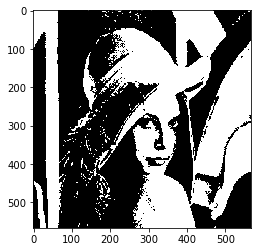

In [29]:
plt.imshow(x_2, interpolation='nearest',cmap='gray')
plt.show()

In [30]:
cv2.imshow('image',x_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
cv2.imwrite('original_black_white.jpg', 255*x_2)
#import base64
#original_image = open('original_black_white.jpg', 'rb')
#original_image_read = original_image.read()
#original_image_64_encode = base64.b64encode(original_image_read)
#original_image_64_decode = base64.b64decode(original_image_64_encode) 
#image_result = open('decrypted_original_black_white.jpg', 'wb') # create a writable image and write the decoding result
#image_result.write(original_image_64_decode)

True

In [32]:
s1=np.random.rand(128,1)

In [33]:
s1.shape

(128, 1)

In [34]:
a_2=np.array([0.00001,0.0001,0.001,0.01,0.1,1,1.1,1.2])
all_possible_images_2=[]
alphas_2=[]
decoded_array_2=[]
for i in a_2:
    encrypted_img=x_2+(np.dot(D_dagger_2,(np.dot(i,s1)-np.dot(D_normalized_2,x_2))))
    encrypted_img_new = np.where(encrypted_img > 1, 1, encrypted_img)
    encrypted_img_new = np.where(encrypted_img_new < 0, 0, encrypted_img_new)
    
    y=np.dot(D_normalized_2,encrypted_img_new)
    np.sign(y)
    y_sign=np.mean(np.sign(y))
    
    all_possible_images_2.append(encrypted_img_new)
    alphas_2.append(i)
    decoded_array_2.append(y_sign)
    


In [35]:
image_df_2=pd.DataFrame()

In [36]:
image_df_2['all_possible_images']=pd.Series(all_possible_images_2)
image_df_2['alphas']=pd.Series(alphas_2)
image_df_2['decoded_array']=pd.Series(decoded_array_2)


In [37]:
image_df_2

,all_possible_images,alphas,decoded_array
0,"[[0.8699616871852857, 0.8559901627644951, 0.85...",0.00001,-0.084381
1,"[[0.8705719409188901, 0.8566004164980997, 0.85...",0.00010,-0.083003
2,"[[0.8766744782549343, 0.8627029538341437, 0.86...",0.00100,-0.067571
3,"[[0.9376998516153766, 0.9237283271945861, 0.92...",0.01000,0.079696
4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0.10000,0.675540
5,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1.00000,0.631917
6,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1.10000,0.630842
7,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1.20000,0.629271


Text(0.5, 1.0, 'Just a black image to fill the last spot')

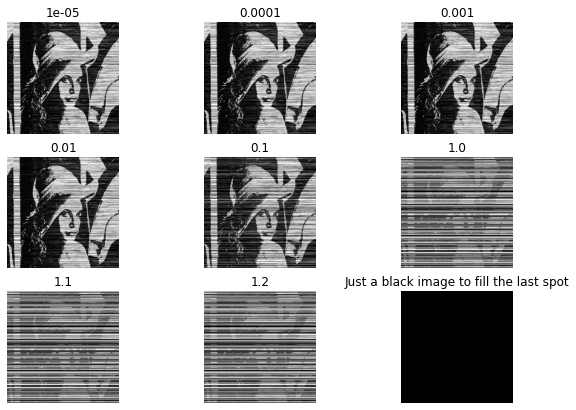

In [38]:
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 3
columns = 3

fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(image_df_2.iloc[0,0], cmap='gray')
plt.axis('off')
plt.title(image_df_2.iloc[0,1])
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(image_df_2.iloc[1,0], cmap='gray')
plt.axis('off')
plt.title(image_df_2.iloc[1,1])
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(image_df_2.iloc[2,0], cmap='gray')
plt.axis('off')
plt.title(image_df_2.iloc[2,1])

fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(image_df_2.iloc[3,0], cmap='gray')
plt.axis('off')
plt.title(image_df_2.iloc[3,1])
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(image_df_2.iloc[4,0], cmap='gray')
plt.axis('off')
plt.title(image_df_2.iloc[4,1])

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(image_df_2.iloc[5,0], cmap='gray')
plt.axis('off')
plt.title(image_df_2.iloc[5,1])

fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(image_df_2.iloc[6,0], cmap='gray')
plt.axis('off')
plt.title(image_df_2.iloc[6,1])
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 8)
  
# showing image
plt.imshow(image_df_2.iloc[7,0], cmap='gray')
plt.axis('off')
plt.title(image_df_2.iloc[7,1])


fig.add_subplot(rows, columns, 9)
  
# showing image
img_white = np.zeros([100,100,3],dtype=np.uint8)
#img_white.fill(255) # or img[:] = 255

plt.imshow(img_white)
plt.axis('off')
plt.title("Just a black image to fill the last spot")